In [2]:
import os

import matplotlib as plt
import pandas as pd
pd.set_option('precision', 2)

%matplotlib inline
plt.style.use('ggplot')

In [3]:
def plot(df, attr_str):
    p = df[['attr', 'number']].plot(kind='bar', x='attr', y='number', legend=False, title='jtdc - inmate %s' % attr_str)
    p.set_xlabel(attr_str)
    p.set_xticklabels(df['attr'], rotation=0)
    p.set_ylabel('count')

In [14]:
files = os.listdir('./by-demos/raw')

def skiptrailingspace(s):
    return s.rstrip()

def process(df):
    df.columns = ['attr', 'number', 'pct']
    df['number'] = pd.to_numeric(df['number'])
    df['pct'] = df['pct'].str.rstrip('% ')
    df['pct'] = pd.to_numeric(df['pct'])
    df['total_pop'] = 225
    df['pct_check'] = df['number'] / df['total_pop'] * 100

In [38]:
for f in files:
    if 'csv' in str(f):
        spec = f.partition('population-')[2].partition('-10')[0]
        csv = ('by-demos/raw/%s' % f)
        df = '%s_df' % '_'.join(spec.split('-'))
        try:
            exec('%s = pd.read_csv(csv, header=None, skiprows=1, converters={0: skiptrailingspace})' % df)
            print('%s generated' % df)
            exec('process(%s)' % df)
            dest = 'by-demos/processed/%s' % f
            exec('%s.to_csv(dest, index=False)' % df)
        except:
            print('problem processing %s' % df)
            continue

by_age_df generated
by_gender_df generated
by_probation_involved_df generated
by_race_df generated
by_reason_for_hold_df generated
los_rur_df generated
problem processing los_rur_df


In [28]:
by_gender_df

,attr,number,pct,total_pop,pct_check
0,Male,200,89,225,88.89
1,Female,25,11,225,11.11


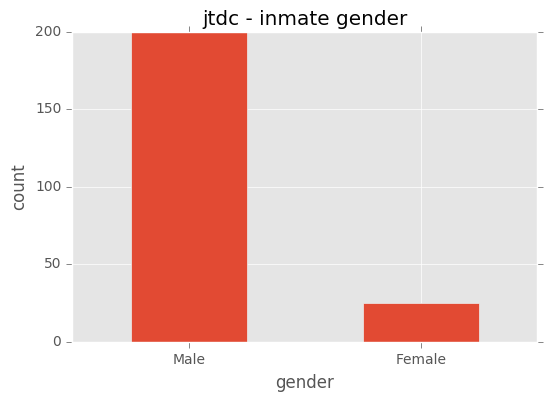

In [29]:
plot(by_gender_df, 'gender')

In [30]:
by_age_df

,attr,number,pct,total_pop,pct_check
0,12,2,1,225,0.89
1,13,7,3,225,3.11
2,14,17,8,225,7.56
3,15,36,16,225,16.00
4,16,74,33,225,32.89
5,17,76,34,225,33.78
6,18,12,5,225,5.33
7,19,1,0,225,0.44


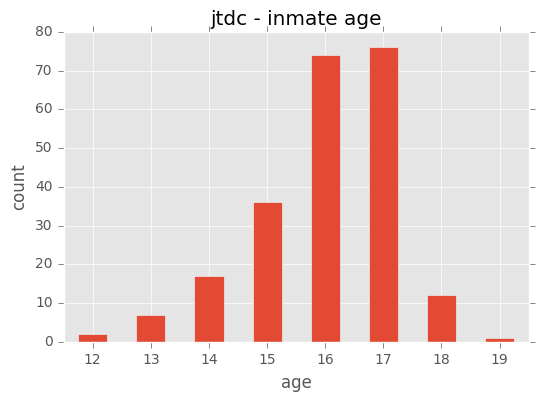

In [31]:
plot(by_age_df, 'age')

In [32]:
by_probation_involved_df

,attr,number,pct,total_pop,pct_check
0,Probation involved at time of hold,132,59,225,58.67
1,Non Probation involved,93,41,225,41.33


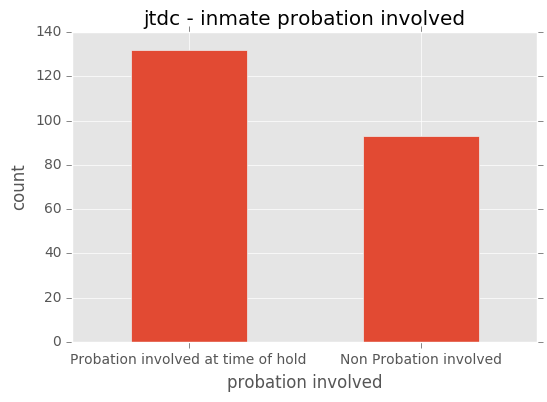

In [33]:
plot(by_probation_involved_df, 'probation involved')

In [34]:
by_race_df

,attr,number,pct,total_pop,pct_check
0,Black,177,79,225,78.67
1,Hispanic,41,18,225,18.22
2,White,6,3,225,2.67
3,Other,1,0,225,0.44


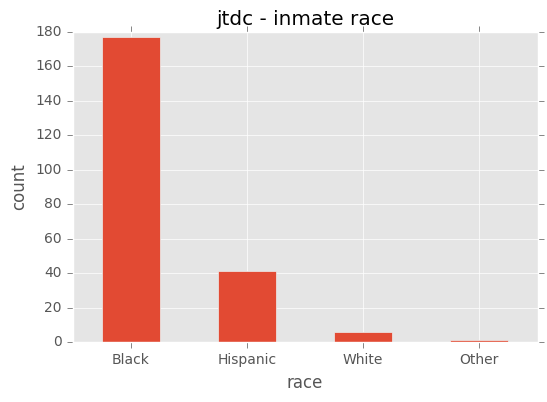

In [35]:
plot(by_race_df, 'race')

In [36]:
by_reason_for_hold_df

,attr,number,pct,total_pop,pct_check
0,New Offense,116,52,225,51.56
1,Court Hold,20,9,225,8.89
2,Juvenile Arrest Warrant,83,37,225,36.89
3,Violation of Probation,6,3,225,2.67


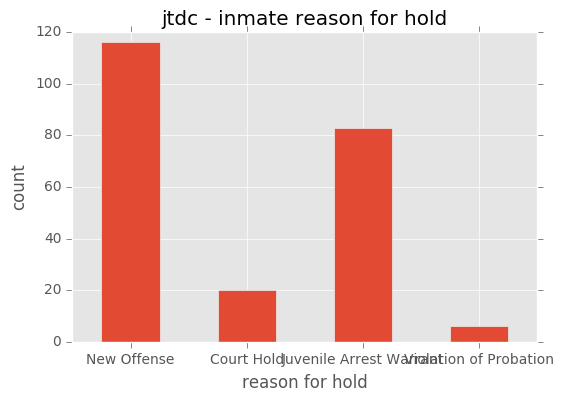

In [37]:
plot(by_reason_for_hold_df, 'reason for hold')